In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

#import seaborn as sns

In [2]:
import numpy as np
import h5py
from corner import corner
#from getdist import plots, MCSamples
#import getdist
from chainconsumer import ChainConsumer
from glob import glob

In [3]:
#test_path = '/home/users/swmclau2/scratch/uatu_preds/deep_resnet_smooth_1.0_noise_0.3_10.hdf5'
#test_files = sorted(glob('../preds/*scattering*mcmc.hdf5'))
test_files = sorted(glob('/home/users/swmclau2/scratch/uatu_preds/*scattering*smooth_0.0*'))

In [4]:
print test_files

['/home/users/swmclau2/scratch/uatu_preds/uatu_scattering_smooth_0.0_noise_0.0_s1_emu_mcmc.hdf5', '/home/users/swmclau2/scratch/uatu_preds/uatu_scattering_smooth_0.0_noise_0.0_s1_s2_emu_mcmc.hdf5', '/home/users/swmclau2/scratch/uatu_preds/uatu_scattering_smooth_0.0_noise_0.0_s2_emu_mcmc.hdf5']


In [5]:
#test_names = ['Adv. Resnet', 'Shuffled Resnet', 'Resnet', 'Gupta']
#test_names = ['Adv. Resnet', 'Resnet', 'Gupta']
#test_names = ['MCMC' for i in xrange(2)]
test_names = ['s1', 's1+s2', 's2']

In [6]:
def get_outputs(test_path):

    with h5py.File(test_path, 'r') as f:
        #print f.keys()
        output = f['chain'][:, :]
    return output, None

In [7]:
names = ['Om', 's8']

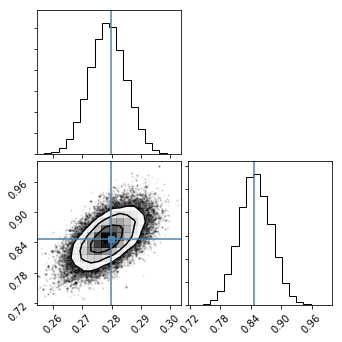

In [8]:
corner(get_outputs(test_files[0])[0][100*200:], truths=[0.279925, 0.846988]);

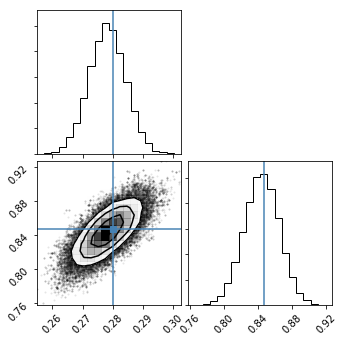

In [9]:
corner(get_outputs(test_files[1])[0][100*200:], truths=[0.279925, 0.846988]);

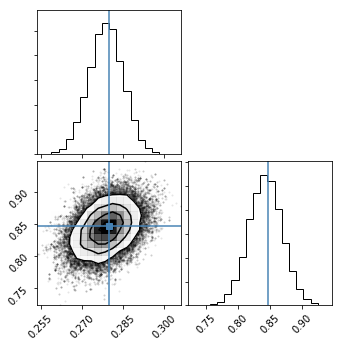

In [10]:
corner(get_outputs(test_files[2])[0][100*200:], truths=[0.279925, 0.846988]);

In [11]:
all_outputs = [get_outputs(test_files[i])[0][100*200:] for i in range(3)]

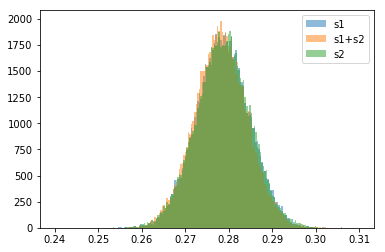

In [12]:
bins = np.linspace(0.24,0.31, 200)
for ao, name in zip(all_outputs, test_names):
    plt.hist(ao[:,0], bins = bins, alpha = 0.5, label=name)
    
plt.legend(loc='best')
    
plt.show()

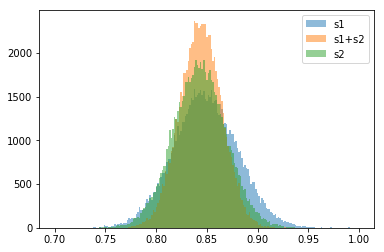

In [13]:
bins = np.linspace(0.7,1.0, 200)
for ao, name in zip(all_outputs, test_names):
    plt.hist(ao[:,1], bins = bins, alpha = 0.5, label = name)

plt.legend(loc='best')
plt.show()

In [14]:
for ao, name in zip(all_outputs, test_names):
    print name, ao.mean(axis=0), ao.std(axis=0)

s1 [ 0.27863866  0.84849882] [ 0.00617136  0.03163305]
s1+s2 [ 0.27815837  0.84383047] [ 0.00603187  0.02058484]
s2 [ 0.27868903  0.84273547] [ 0.00626265  0.0262324 ]


In [15]:
truth = [0.279925, 0.846988]
c.plotter.plot(figsize='PAGE', truth=truth);

NameError: name 'c' is not defined

In [ ]:
truth = [0.279925, 0.846988]
c.plotter.plot(chains=0,figsize='PAGE', truth=truth);

In [ ]:
truth = [0.279925, 0.846988]
c.plotter.plot(chains=1,figsize='PAGE', truth=truth);